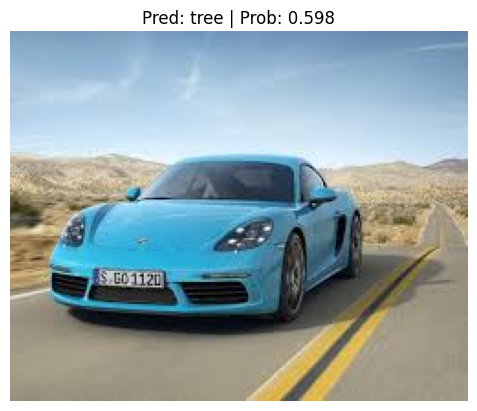

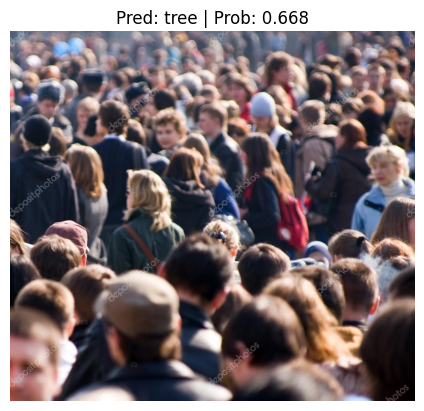

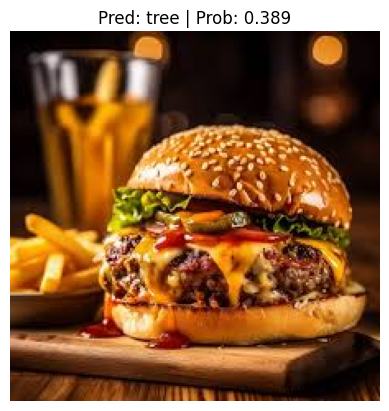

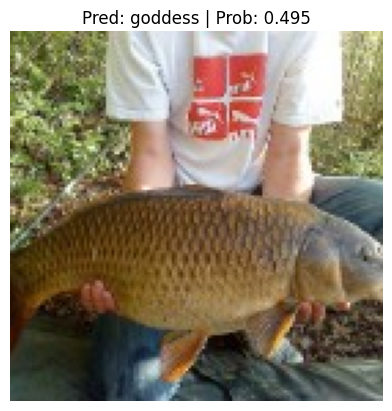

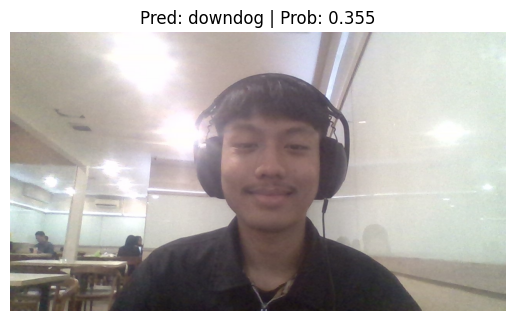

In [2]:
# import model_vig
import model_mobile_vig
import torch
from pathlib import Path
import os
import helpers

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model_path = "./models/test.pth"
checkpoint = torch.load(model_path)
state_dict = checkpoint["model_state_dict"]
class_names = ["downdog", "goddess", "plank", "tree", "warrior2"]

model = model_mobile_vig.mobilevig_ti(num_classes=len(class_names)).to(device)
# model = model_vig.vig_ti_224_gelu(num_classes=len(class_names)).to(device)
model.load_state_dict(state_dict)
model.eval()

random_image_folder = Path("./data/data-random/")

for image_name in os.listdir(random_image_folder):
    image_path = os.path.join(random_image_folder, image_name)

    custom_image_path = Path(image_path)

    helpers.pred_and_plot_image(
        model=model, image_path=str(custom_image_path), class_names=class_names
    )

torch.cuda.empty_cache()